In [93]:
# https://stackoverflow.com/questions/19915266/drawing-a-graph-with-networkx-on-a-basemap
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import pandas as pd
from geopy.distance import lonlat, distance, geodesic
from matplotlib.pyplot import figure

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/home/matthew/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


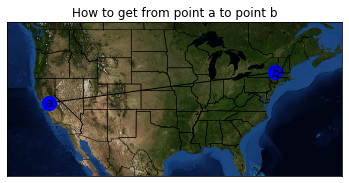

In [14]:
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

# position in decimal lat/lon
lats=[37.96,42.82]
lons=[-121.29,-73.95]
# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

In [17]:
northamerica = pd.read_csv('northamericacomplete.csv')

In [18]:
northamerica

Name      State/Estado/Province        Country  \
0                 St. John's  Newfoundland and Labrador         Canada   
1       Conception Bay South  Newfoundland and Labrador         Canada   
2                Cape Breton                Nova Scotia         Canada   
3              Charlottetown       Prince Edward Island         Canada   
4                    Halifax                Nova Scotia         Canada   
..                       ...                        ...            ...   
688                Anchorage                     Alaska  United States   
689                     Hilo                     Hawaii  United States   
690  Kahului-Wailuku-Lahaina                     Hawaii  United States   
691                 Honolulu                     Hawaii  United States   
692                    Kapaa                     Hawaii  United States   

    Distance to closest larger city (KM) 60 cities Region 190 km  \
0                           inaccessible                     NaN   
1                                    NaN                     NaN   
2                                    NaN                     NaN   
3                                    165                     NaN   
4                                    890                     NaN   
..                                   ...                     ...   
688                                 3121                     NaN   
689                                  NaN                     NaN   
690                                  NaN                     NaN   
691                         inaccessible                     NaN   
692                                  NaN                     NaN   

    60 cities Region 380 km 60 cities Region 475 km 100 cities Region 190 km  \
0                       NaN                     NaN                      NaN   
1                       NaN                     NaN                      NaN   
2                       NaN                     NaN                      NaN   
3                       NaN                     NaN                      NaN   
4                       NaN                     NaN                      NaN   
..                      ...                     ...                      ...   
688                     NaN                     NaN                      NaN   
689                     NaN                     NaN                      NaN   
690                     NaN                     NaN                      NaN   
691                     NaN                     NaN                      NaN   
692                     NaN                     NaN                      NaN   

     Population Rank    Rank Power  ...  Score Rank Population PSA Rank  \
0                274       #VALUE!  ...         NaN                 NaN   
1                642             0  ...         NaN                 NaN   
2                402             0  ...         NaN                 NaN   
3                449  0.3674832962  ...         NaN                 NaN   
4                179   4.972067039  ...         NaN                 NaN   
..               ...           ...  ...         ...                 ...   
688              181   17.24309392  ...         NaN                 NaN   
689              285             0  ...         NaN                 NaN   
690              303             0  ...         NaN                 NaN   
691               85       #VALUE!  ...         NaN                 NaN   
692              446             0  ...         NaN                 NaN   

     Number of Routes  Number of trains Missing railroad?  Note  Latitude  \
0                 NaN               NaN               NaN   NaN    47.550   
1                 NaN               NaN               NaN   NaN    47.500   
2                 NaN               NaN               NaN   NaN    46.150   
3                 NaN               NaN               NaN   NaN    46.250   
4                 NaN               NaN               NaN   NaN    44.5

In [19]:
df = northamerica[['Name','State/Estado/Province','Country', 'Longitude', 'Latitude','Population']]
df = df.dropna()
df['Longitude'] = df['Longitude'] * -1

In [20]:
df

Name      State/Estado/Province        Country  \
0                 St. John's  Newfoundland and Labrador         Canada   
1       Conception Bay South  Newfoundland and Labrador         Canada   
2                Cape Breton                Nova Scotia         Canada   
3              Charlottetown       Prince Edward Island         Canada   
4                    Halifax                Nova Scotia         Canada   
..                       ...                        ...            ...   
688                Anchorage                     Alaska  United States   
689                     Hilo                     Hawaii  United States   
690  Kahului-Wailuku-Lahaina                     Hawaii  United States   
691                 Honolulu                     Hawaii  United States   
692                    Kapaa                     Hawaii  United States   

     Longitude  Latitude  Population  
0    -52.70000    47.550      205955  
1    -53.00000    47.500       26199  
2    -60.75000    46.150       98722  
3    -63.10000    46.250       69325  
4    -63.50600    44.515      403390  
..         ...       ...         ...  
688 -149.90000    61.200      398892  
689 -155.10000    19.700      194190  
690 -156.45000    20.850      163108  
691 -157.80000    21.300      991788  
692 -159.33333    22.100       70475  

[693 rows x 6 columns]

In [22]:
df.shape

(693, 6)

In [23]:
df2 = pd.concat([pd.concat([df[df.index == 0]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1)
for n in list(range(0, df.shape[0])):
    df3 = pd.concat([pd.concat([df[df.index == n]]*df.shape[0]).reset_index().add_suffix('_x'), df], 1)
    df2 = pd.concat([df2, df3])

In [33]:
df=df2
df

index_x      Name_x    State/Estado/Province_x      Country_x  \
0          0  St. John's  Newfoundland and Labrador         Canada   
1          0  St. John's  Newfoundland and Labrador         Canada   
2          0  St. John's  Newfoundland and Labrador         Canada   
3          0  St. John's  Newfoundland and Labrador         Canada   
4          0  St. John's  Newfoundland and Labrador         Canada   
..       ...         ...                        ...            ...   
688      692       Kapaa                     Hawaii  United States   
689      692       Kapaa                     Hawaii  United States   
690      692       Kapaa                     Hawaii  United States   
691      692       Kapaa                     Hawaii  United States   
692      692       Kapaa                     Hawaii  United States   

     Longitude_x  Latitude_x  Population_x                     Name  \
0      -52.70000       47.55        205955               St. John's   
1      -52.70000       47.55        205955     Conception Bay South   
2      -52.70000       47.55        205955              Cape Breton   
3      -52.70000       47.55        205955            Charlottetown   
4      -52.70000       47.55        205955                  Halifax   
..           ...         ...           ...                      ...   
688   -159.33333       22.10         70475                Anchorage   
689   -159.33333       22.10         70475                     Hilo   
690   -159.33333       22.10         70475  Kahului-Wailuku-Lahaina   
691   -159.33333       22.10         70475                 Honolulu   
692   -159.33333       22.10         70475                    Kapaa   

         State/Estado/Province        Country  Longitude  Latitude  Population  
0    Newfoundland and Labrador         Canada  -52.70000    47.550      205955  
1    Newfoundland and Labrador         Canada  -53.00000    47.500       26199  
2                  Nova Scotia         Canada  -60.75000    46.150       98722  
3         Prince Edward Island         Canada  -63.10000    46.250       69325  
4                  Nova Scotia         Canada  -63.50600    44.515      403390  
..                         ...            ...        ...       ...         ...  
688                     Alaska  United States -149.90000    61.200      398892  
689                     Hawaii  United States -155.10000    19.700      194190  
690                     Hawaii  United States -156.45000    20.850      163108  
691                     Hawaii  United States -157.80000    21.300      991788  
692                     Hawaii  United States -159.33333    22.100       70475  

[480942 rows x 13 columns]

In [45]:
df=df.reset_index()

In [46]:
df['distance']= [geodesic(lonlat(df['Longitude'][x], df['Latitude'][x]), 
                          lonlat(df['Longitude_x'][x], df['Latitude_x'][x])).km 
                 for x in [*range(df.shape[0])]]

In [47]:
df['power']=df['Population']*df['Population_x']/df['distance']

In [65]:
df=df[df['power']<np.inf]
df=df.drop_duplicates(subset='power').sort_values('power',ascending=False).drop(['index','index_x'],1)
#df.to_pickle('globeplotter.pkl')

In [67]:
df=df.sort_values('power',ascending=False).reset_index().drop('index',1)
df

Name_x State/Estado/Province_x      Country_x  Longitude_x  \
0             New York                New York  United States       -74.00   
1          Mexico City        Distrito Federal         Mexico       -99.15   
2             New York                New York  United States       -74.00   
3               Boston           Massachusetts  United States       -71.00   
4               Puebla                  Puebla         Mexico       -97.90   
...                ...                     ...            ...          ...   
239771          Lamesa                   Texas  United States      -101.95   
239772      Fitzgerald                 Georgia  United States       -83.25   
239773          Vernon                   Texas  United States       -99.30   
239774  Vineyard Haven           Massachusetts  United States       -70.60   
239775          Zapata                   Texas  United States       -99.25   

        Latitude_x  Population_x                  Name State/Estado/Province  \
0            40.70      23362099          Philadelphia          Pennsylvania   
1            19.45      20137152                Toluca                Mexico   
2            40.70      23362099  Washington/Baltimore                    DC   
3            42.50       7991371              New York              New York   
4            19.00       2728790           Mexico City      Distrito Federal   
...            ...           ...                   ...                   ...   
239771       32.75         13372             Ketchikan                Alaska   
239772       31.60         17464             Ketchikan                Alaska   
239773       34.15         12973             Ketchikan                Alaska   
239774       41.45         17356             Ketchikan                Alaska   
239775       26.90         14319             Ketchikan                Alaska   

              Country  Longitude  Latitude  Population     distance  \
0       United States    -75.000   40.0000     7129428   115.147723   
1              Mexico    -99.650   19.3000     1936126    55.088885   
2       United States    -77.000   39.0000     9331587   318.626726   
3       United States    -74.000   40.7000    23362099   320.148340   
4              Mexico    -99.150   19.4500    20137152   140.558942   
...               ...        ...       ...         ...          ...   
239771  United States   -131.666   55.3333       13787  3409.556211   
239772  United States   -131.666   55.3333       13787  4587.183725   
239773  United States   -131.666   55.3333       13787  3424.518235   
239774  United States   -131.666   55.3333       13787  4609.814828   
239775  United States   -131.666   55.3333       13787  4097.439876   

               power  
0       1.446476e+12  
1       7.077301e+11  
2       6.842033e+11  
3       5.831522e+11  
4       3.909396e+11  
...              ...  
239771  5.407148e+04  
239772  5.248889e+04  
239773  5.222888e+04  
239774  5.190820e+04  
239775  4.818034e+04  

[239776 rows x 14 columns]

In [68]:
df.head(100)

Name_x State/Estado/Province_x      Country_x  Longitude_x  \
0      New York                New York  United States       -74.00   
1   Mexico City        Distrito Federal         Mexico       -99.15   
2      New York                New York  United States       -74.00   
3        Boston           Massachusetts  United States       -71.00   
4        Puebla                  Puebla         Mexico       -97.90   
..          ...                     ...            ...          ...   
95      Seattle              Washington  United States      -122.25   
96        Miami                 Florida  United States       -80.25   
97       Boston           Massachusetts  United States       -71.00   
98     New York                New York  United States       -74.00   
99      Atlanta                 Georgia  United States       -84.50   

    Latitude_x  Population_x                  Name State/Estado/Province  \
0        40.70      23362099          Philadelphia          Pennsylvania   
1        19.45      20137152                Toluca                Mexico   
2        40.70      23362099  Washington/Baltimore                    DC   
3        42.50       7991371              New York              New York   
4        19.00       2728790           Mexico City      Distrito Federal   
..         ...           ...                   ...                   ...   
95       47.50       4399332              Portland                Oregon   
96       25.75       6375434               Orlando               Florida   
97       42.50       7991371               Chicago              Illinois   
98       40.70      23362099                Ottawa        Ontario/Quebec   
99       33.75       6092295           Mexico City      Distrito Federal   

          Country  Longitude  Latitude  Population     distance         power  
0   United States     -75.00     40.00     7129428   115.147723  1.446476e+12  
1          Mexico     -99.65     19.30     1936126    55.088885  7.077301e+11  
2   United States     -77.00     39.00     9331587   318.626726  6.842033e+11  
3   United States     -74.00     40.70    23362099   320.148340  5.831522e+11  
4          Mexico     -99.15     19.45    20137152   140.558942  3.909396e+11  
..            ...        ...       ...         ...          ...           ...  
95  United States    -122.75     45.50     2992924   225.609423  5.836133e+10  
96  United States     -81.25     28.50     2920603   320.433756  5.810908e+10  
97  United States     -87.75     42.00     9899902  1381.172189  5.728018e+10  
98         Canada     -75.70     45.40     1323783   540.162440  5.725379e+10  
99         Mexico     -99.15     19.45    20137152  2148.943927  5.708919e+10  

[100 rows x 14 columns]

In [72]:
df.head(100)[['Longitude_x','Latitude_x','Longitude','Latitude']].head()

Longitude_x  Latitude_x  Longitude  Latitude
0       -74.00       40.70     -75.00     40.00
1       -99.15       19.45     -99.65     19.30
2       -74.00       40.70     -77.00     39.00
3       -71.00       42.50     -74.00     40.70
4       -97.90       19.00     -99.15     19.45

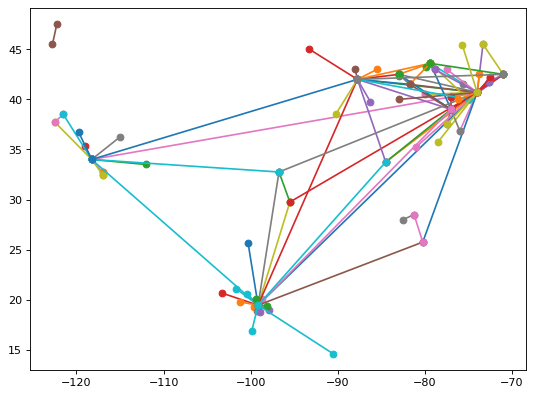

In [94]:
G=nx.Graph()
def plotter(df):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for n in range(0,df.shape[0]):
        plt.plot([df.iloc[n]['Longitude'],df.iloc[n]['Longitude_x']],[df.iloc[n]['Latitude'],df.iloc[n]['Latitude_x']], marker = 'o')
    plt.show()
plotter(df.head(100))

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


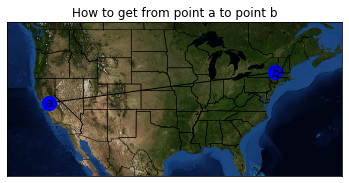

In [91]:
def plotter(df):
    m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    for n in range(0,df.shape[0]):
        plt.plot([df.iloc[n]['Longitude'],df.iloc[n]['Longitude_x']],[df.iloc[n]['Latitude'],df.iloc[n]['Latitude_x']], marker = 'o')
    plt.show()

# position in decimal lat/lon
lats=[37.96,42.82]
lons=[-121.29,-73.95]
# convert lat and lon to map projection
mx,my=m(lons,lats)

# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

In [142]:
l=list(zip(df.head(100)['Name'],df.head(100)['Name_x']))
l[0][0]

'Philadelphia'

In [144]:
pos['Philadelphia']

(22794949.228359643, 3742857.6701531745)

In [146]:
l

[('Philadelphia', 'New York'),
 ('Toluca', 'Mexico City'),
 ('Washington/Baltimore', 'New York'),
 ('New York', 'Boston'),
 ('Mexico City', 'Puebla'),
 ('Washington/Baltimore', 'Philadelphia'),
 ('Los Angeles', 'San Diego'),
 ('Cuernavaca', 'Mexico City'),
 ('San Jose/San Francisco', 'Los Angeles'),
 ('Toronto', 'New York'),
 ('New York', 'Hartford'),
 ('Tijuana', 'San Diego'),
 ('Chicago', 'New York'),
 ('Guadalajara', 'Mexico City'),
 ('New York', 'Montreal'),
 ('Milwaukee', 'Chicago'),
 ('San Jose/San Francisco', 'Sacramento'),
 ('Detroit', 'New York'),
 ('Los Angeles', 'Tijuana'),
 ('Los Angeles', 'Mexico City'),
 ('Mexico City', 'New York'),
 ('New York', 'Albany'),
 ('Los Angeles', 'Phoenix'),
 ('Chicago', 'Detroit'),
 ('Philadelphia', 'Boston'),
 ('Cleveland', 'New York'),
 ('Mexico City', 'Pachuca'),
 ('Detroit', 'Cleveland'),
 ('Pittsburgh', 'New York'),
 ('Santiago de Querétaro', 'Mexico City'),
 ('Monterrey', 'Mexico City'),
 ('Atlanta', 'New York'),
 ('Dallas (Fort Worth)',

In [148]:
l[0]

('Philadelphia', 'New York')

In [150]:
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=10,
        urcrnrlon=-60,
        urcrnrlat=65,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)
mx,my=m([*northamerica['Longitude']],[*northamerica['Latitude']])
cities=northamerica['Name']
pos={}
for n in [*northamerica.index]:
    pos[cities[n]]=(mx[n],my[n])
G=nx.Graph()
#for x in list(zip(df.head(100)['Name'],df.head(100)['Name_x'])):
#    G.add_edge(x[0],x[1])
pos

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


{"St. John's": (20315303.53181125, 4907924.426415193),
 'Conception Bay South': (20348661.994096655, 4899691.0425668),
 'Cape Breton': (21210422.269802935, 4680284.308214314),
 'Charlottetown': (21471730.224371936, 4696349.614250653),
 'Halifax': (21516875.343331516, 4421643.280615771),
 'Moncton': (21655201.76694166, 4672262.600457448),
 'Saint John': (21801607.61011733, 4536990.513274941),
 'Fredericton': (21868317.86299568, 4648241.026519332),
 'Bangor': (22099981.264080383, 4466195.085249707),
 'Augusta': (23573313.34835241, 2839787.681985518),
 'Portland': (28104504.47545317, 4576563.785514223),
 'Vineyard Haven': (22305691.781507045, 3955621.81381776),
 'Boston': (22350169.731220916, 4112674.719230525),
 'Saguenay': (22357581.981540736, 5065876.487682901),
 'Quebec City': (22372408.70607785, 4785237.055878072),
 'Berlin': (22372408.70607785, 4411512.898515637),
 'Sherbrooke': (22450245.11807713, 4560713.473833136),
 'Keene': (22489163.324076768, 4180789.0304271914),
 'Claremont':

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


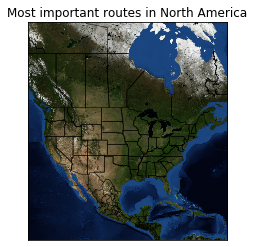

In [151]:
#for x in l:
#    G.add_edge()
G.add_edge('Seattle','Portland')
G.add_edge('New York','Philadelphia')
nx.draw_networkx(G,pos,node_size=20,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('Most important routes in North America')
plt.show()

In [111]:
targets=[tuple(x) for x in [x[0] for x in l[0:100]]]
targets[0]

([6226912.959942146, 6115718.085657465],
 [3844992.857554351, 3742857.6701531745])

In [114]:
[[tuple(x) for x in y] for y in [tuple(x) for x in [x[0] for x in l[0:100]]]]

[[(6226912.959942146, 6115718.085657465),
  (3844992.857554351, 3742857.6701531745)],
 [(3430361.871682414, 3374764.4345400734),
  (1087879.2722200344, 1070198.742553599)],
 [(6226912.959942146, 5893328.3370881025),
  (3844992.857554351, 3598748.4669493632)],
 [(6560497.58279619, 6226912.959942146),
  (4112674.719230525, 3844992.857554351)],
 [(3569355.464538265, 3430361.871682414),
  (1034886.1394878074, 1087879.2722200344)],
 [(6115718.085657465, 5893328.3370881025),
  (3742857.6701531745, 3598748.4669493632)],
 [(1445533.3657008554, 1306539.7728450038),
  (2740206.530418624, 2906654.552723795)],
 [(3430361.871682414, 3420354.3329967936),
  (1087879.2722200344, 1023129.4659725933)],
 [(1306539.7728450038, 833961.5571351089),
  (2906654.552723795, 3421444.745953325)],
 [(6226912.959942146, 5626460.638804867),
  (3844992.857554351, 4280061.83547597)],
 [(6371466.296512231, 6226912.959942146),
  (4000230.8612204874, 3844992.857554351)],
 [(1445533.3657008554, 1445533.3657008554),
  (274

In [108]:
[x[0] for x in l[0:100]]

[([6226912.959942146, 6115718.085657465],
  [3844992.857554351, 3742857.6701531745]),
 ([3430361.871682414, 3374764.4345400734],
  [1087879.2722200344, 1070198.742553599]),
 ([6226912.959942146, 5893328.3370881025],
  [3844992.857554351, 3598748.4669493632]),
 ([6560497.58279619, 6226912.959942146],
  [4112674.719230525, 3844992.857554351]),
 ([3569355.464538265, 3430361.871682414],
  [1034886.1394878074, 1087879.2722200344]),
 ([6115718.085657465, 5893328.3370881025],
  [3742857.6701531745, 3598748.4669493632]),
 ([1445533.3657008554, 1306539.7728450038],
  [2740206.530418624, 2906654.552723795]),
 ([3430361.871682414, 3420354.3329967936],
  [1087879.2722200344, 1023129.4659725933]),
 ([1306539.7728450038, 833961.5571351089],
  [2906654.552723795, 3421444.745953325]),
 ([6226912.959942146, 5626460.638804867],
  [3844992.857554351, 4280061.83547597]),
 ([6371466.296512231, 6226912.959942146],
  [4000230.8612204874, 3844992.857554351]),
 ([1445533.3657008554, 1445533.3657008554],
  [274

/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/matthew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


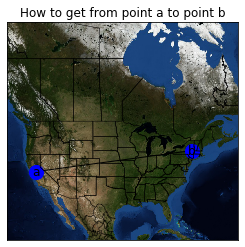

In [118]:
# position in decimal lat/lon
lats=[37.96,42.82,47]
lons=[-121.29,-73.95,123]
# convert lat and lon to map projection
mx,my=m(lons,lats)
# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

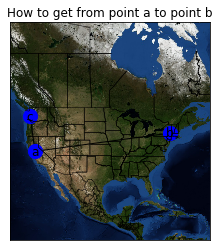

In [152]:
# position in decimal lat/lon
lats=[37.96,42.82,47]
lons=[-121.29,-73.95,-123]
# convert lat and lon to map projection
mx,my=m(lons,lats)
# The NetworkX part
# put map projection coordinates in pos dictionary
G=nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
pos={}
pos['a']=(mx[0],my[0])
pos['b']=(mx[1],my[1])
pos['c']=(mx[2],my[2])
# draw
nx.draw_networkx(G,pos,node_size=200,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('How to get from point a to point b')
plt.show()

In [153]:
pos

{'a': (968507.3550195724, 3451019.1496030884),
 'b': (6232472.70365638, 4161060.729463121),
 'c': (778364.1199927683, 4817784.78826752)}